<a href="https://colab.research.google.com/github/marce3-2140/sales-predictions/blob/main/sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sales-Prediction Proyect**

Este proyecto es una prediccion de ventas para productos vendidos en diversas tiendas. El objetivo de este, es ayudar al minorista a comprender las propiedades de los productos y los puntos de venta que desempeñan un papel crucial en el aumento de ventas.

**Diccionario de Datos**

> [byTablesGenerator](https://www.tablesgenerator.com/markdown_tables)

| Nombre de la variable     | Dtype  | Descripción                                                                                                        |
|---------------------------|--------|--------------------------------------------------------------------------------------------------------------------|
| Item_Identifier           | Object | Identificación única del producto                                                                                  |
| Item_Weight               | float  | Peso del producto                                                                                                  |
| Item_Fat_Content          | Object | Si el producto es bajo en grasa o regular                                                                          |
| Item_Visibility           | float  | Porcentaje de la superficie total de exposición de todos los productos de una tienda asignada al producto concreto |
| Item_Type                 | Object | Categoría a la que el producto pertenece                                                                           |
| Item_MRP                  | float  | Precio máximo de venta al público (precio de catálogo) del producto                                                |
| Outlet_Identifier         | Object | Identificación única de la tienda                                                                                  |
| Outlet_Establishment_Year | int    | El año en que se estableció la tienda                                                                              |
| Outlet_Size               | Object | El tamaño de la tienda en cuanto al área total                                                                     |
| Outlet_Location_Type      | Object | El tipo de área donde se encuentra la tienda                                                                       |
| Outlet_Type               | Object | Si el punto de venta es una tienda de comestibles o algún tipo de supermercado                                     |
| Item_Outlet_Sales         | float  | Ventas del producto en una tienda particular. Es la variable objetivo a predecir.                                  |

## Importe de Librerias

In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [46]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [47]:
filename = '/content/drive/MyDrive/CodingDojo/Proyecto1/sales_predictions_2023.csv'
df = pd.read_csv(filename)

###I. **Análisis Exploratorio**

**1. Cuántas filas y columnas**

In [48]:
df.shape

(8523, 12)

El Data Frame contiene 8523 filas y 12 columnas

**2. ¿Cuáles son los datos en cada variable?**

In [49]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


**3. ¿Hay duplicados?**

In [51]:
df.duplicated().value_counts()

False    8523
dtype: int64

*Respuesta*

1. No hay renglones duplicados

**4. Identifiquen los valores faltantes**

In [52]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [53]:
#Encontramos valores faltamtes en Outlet_Size = 2410 (El tamaño de la tienda en cuanto al área total)
o_size_missing = df['Outlet_Size'].isna().sum()
percent_o_size_missing = (o_size_missing/len(df))*100
print(f"La columna 'Outlet_Size' tiene {percent_o_size_missing:.2f}% de datos nulos")

La columna 'Outlet_Size' tiene 28.28% de datos nulos


In [54]:
#Encontramos valores faltantes en:
#Item_Weight = 1463 (Peso del producto)
iweight_missing = df['Item_Weight'].isna().sum()
#total de filas
total_rows = df.shape[0]
percent_iweight_missing = (iweight_missing/total_rows)*100
print(f'La columna Item_Weight tiene {percent_iweight_missing:.2f}% de datos nulos')

La columna Item_Weight tiene 17.17% de datos nulos


###II. **Manipulación de datos**

**5. Decidan cómo abordar los valores faltantes y cómo hacerlo**

(Expliquen su elección)

*Los valores faltantes en "Item_Weight" son inferiores al 28% de los datos, y los valores faltantes para "Outlet_Size" son del 17%, como ambos son inferiores al 30% de los datos, no es conveniente eliminar toda la columna, podemos buscar otras maneras de reemplazar los datos faltantes, revisaremos la correlacion de esta columna con otras columnas del dataframe, si las hubiere.*

#### **Abordaje de los datos faltantes para Item_Weight**

Revisamos los valores faltantes en: "Item_Weight" y su correlación con otras columnas del dataframe

In [55]:
#Filtramos los datos nulos de Item_Weight para identificar con que otra columna puede relacionarse
iweight_missing = df['Item_Weight'].isnull() #filtro para valores NaN
df.loc[iweight_missing,:].head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
36,FDV20,NaN,Regular,0.059512,Fruits and Vegetables,128.0678,OUT027,1985,Medium,Tier 3,Supermarket Type3,2797.6916
38,FDX10,NaN,Regular,0.123111,Snack Foods,36.9874,OUT027,1985,Medium,Tier 3,Supermarket Type3,388.1614
39,FDB34,NaN,Low Fat,0.026481,Snack Foods,87.6198,OUT027,1985,Medium,Tier 3,Supermarket Type3,2180.4950
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
59,FDI26,NaN,Low Fat,0.061082,Canned,180.0344,OUT019,1985,Small,Tier 1,Grocery Store,892.1720


Se puede observar una relacion entre la columna con datos faltantes Item Weight y Item_Identifier, vamos a revisar cada item para identificar la correlacion

In [56]:
#revisamos comparando los datos de Item_Weight con otras columnas
df[df['Item_Identifier']=='FDP10']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


En la anterior columna encontramos una correlacion entre la columna 'Item_Weight' y el primer item de 'Item_Identifier', se observa que todos los valores no nulos del mismo identificador corresponden a 19.0

In [57]:
#revisamos comparando los datos de Item_Weight con otras columnas
df[df['Item_Identifier']=='DRI11']


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
1366,DRI11,NaN,Low Fat,0.060237,Hard Drinks,115.9834,OUT019,1985,Small,Tier 1,Grocery Store,345.5502
3127,DRI11,8.26,Low Fat,0.034458,Hard Drinks,113.3834,OUT049,1999,Medium,Tier 1,Supermarket Type1,2073.3012
5310,DRI11,8.26,Low Fat,0.057586,Hard Drinks,113.7834,OUT010,1998,NaN,Tier 3,Grocery Store,115.1834
7022,DRI11,8.26,Low Fat,0.034398,Hard Drinks,115.7834,OUT035,2004,Small,Tier 2,Supermarket Type1,2073.3012
7192,DRI11,8.26,Low Fat,0.034544,Hard Drinks,116.0834,OUT018,2009,Medium,Tier 3,Supermarket Type2,1267.0174
8483,DRI11,8.26,Low Fat,0.034474,Hard Drinks,117.0834,OUT045,2002,NaN,Tier 2,Supermarket Type1,1612.5676


De igual manera encontramos correlacion entre la columna 'Item_Weight' y el primer segundo Item de 'Item_Identifier', se observa que todos los valores no nulos del mismo identificador corresponden a 8.26

In [58]:
#revisamos otro item al azar de la columna "Item_Identifier" para ver si corresponde igual que los anteriores
df[df['Item_Identifier']=='FDS02']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
49,FDS02,NaN,Regular,0.255395,Dairy,196.8794,OUT019,1985,Small,Tier 1,Grocery Store,780.3176
2864,FDS02,NaN,Regular,0.000000,Dairy,196.4794,OUT027,1985,Medium,Tier 3,Supermarket Type3,5852.3820
3203,FDS02,10.195,Regular,0.145867,Dairy,194.0794,OUT046,1997,Small,Tier 1,Supermarket Type1,3901.5880
4969,FDS02,10.195,Regular,0.146692,Dairy,194.5794,OUT017,2007,NaN,Tier 2,Supermarket Type1,4096.6674
7455,FDS02,10.195,Regular,0.146094,Dairy,196.1794,OUT049,1999,Medium,Tier 1,Supermarket Type1,2926.1910


Si, efectivamente se observa una correlacion entre estas dos columnas procederemos a reemplazar los datos faltantes con la mediana de la columna "Item_Weight" donde este corresponda al "Item_Identifier" segun sea el caso.

In [59]:
#realizamos el relleno de los datos faltantes aplicando una funcion lambda.
#primero agrupamos con un groupby los item de Item_Identifier con el valor de los Item_weight
#aplicamos una funcion lambda que revisa cada valor vacio de x(Item_Weight agupado con item_Identifier)
# y los llena con la mediana de x(Item_Weight agupado con item_Identifier) donde si hay dato.
df['Item_Weight'] = df.groupby('Item_Identifier')['Item_Weight'].apply(lambda x: x.fillna(x.median()))


/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/usr/local/lib/python3.10/dist-packages/numpy/lib/nanfunctions.py:1216: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
<ipython-input-59-46aee3e18b91>:5: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To ado

Observamos que arroja 4 RuntimeWarning: Mean of empty slice, esto se debe a que en esas filas no se encontraron datos en relacion a ninguna fila de Item_Weight.

In [60]:
#Revisamos cuales son esos 4 filas que no se llenaron.
iweight_missing = df['Item_Weight'].isnull() #filtro para valores NaN
df.loc[iweight_missing,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
927,FDN52,NaN,Regular,0.130933,Frozen Foods,86.9198,OUT027,1985,Medium,Tier 3,Supermarket Type3,1569.9564
1922,FDK57,NaN,Low Fat,0.079904,Snack Foods,120.0440,OUT027,1985,Medium,Tier 3,Supermarket Type3,4434.2280
4187,FDE52,NaN,Regular,0.029742,Dairy,88.9514,OUT027,1985,Medium,Tier 3,Supermarket Type3,3453.5046
5022,FDQ60,NaN,Regular,0.191501,Baking Goods,121.2098,OUT019,1985,Small,Tier 1,Grocery Store,120.5098


La tabla anterior nos arroja los indices de estos 4 valores que siguen nulos, asi que procedemos a eliminarlos con el metodo drop identificando los indides que queremos que nos elimine. procedemos a eliminar estos 4 valores nulos.

In [61]:
df = df.drop([927, 1922, 4187, 5022])

In [62]:
iweight_missing = df['Item_Weight'].isnull() #filtro para valores NaN
df.loc[iweight_missing,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


Observamos que ya no hay valores nulos en la columna Item_Weight

#### **Abordaje de los datos faltantes para Outlet_Size**

In [63]:
O_Size_missing = df['Outlet_Size'].isnull() #filtro para valores NaN
df.loc[O_Size_missing,:].head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344


Observamos una correlacion en la columna Outlet_Size y la columna Outlet_Type cuando hay valores nulos en Outlet_Size los valores de Outlet_Type se centran en Grocery Store y Supermarket Type1.

In [64]:
#Filtramos Outlet_Type en Supermarket Type1 para conocer los datos de esa variable
df_fil = df[df['Outlet_Type']=='Supermarket Type1']
df_fil_grocery = df_fil.groupby('Outlet_Type')['Outlet_Size'].value_counts()
df_fil_grocery

Outlet_Type        Outlet_Size
Supermarket Type1  Small          1860
                   High            932
                   Medium          930
Name: Outlet_Size, dtype: int64

Al detallar el codigo de Outlet_Type cuando es igual 'Supermarket Type1' encontramos que tiene tres valores distintos para Outlet_Size de Small, High, Medium, por lo que procederemos a llenar los valores faltantes de la columna Outlet_Size con la moda cuando Outlet_Type es igual a Supermarket Type1

In [65]:
moda_01 = df.loc[df['Outlet_Type'] == 'Supermarket Type1', 'Outlet_Size'].mode().iloc[0]

# Rellenar los valores faltantes en la columna Outlet_Size con la moda cuando Outlet_Type es igual a una condición especifica
df.loc[df['Outlet_Type'] == 'Supermarket Type1', 'Outlet_Size'] = df.loc[df['Outlet_Type']== 'Supermarket Type1', 'Outlet_Size'].fillna(moda_01)

In [66]:
df.isnull().sum()

Item_Identifier                0
Item_Weight                    0
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                  555
Outlet_Location_Type           0
Outlet_Type                    0
Item_Outlet_Sales              0
dtype: int64

In [67]:
#Revisamos cuales son esos 4 filas que no se llenaron.
osize_missing = df['Outlet_Size'].isnull() #filtro para valores NaN
df.loc[osize_missing,:]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
28,FDE51,5.925,Regular,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
30,FDV38,19.250,Low Fat,0.170349,Dairy,55.7956,OUT010,1998,NaN,Tier 3,Grocery Store,163.7868
45,FDM39,6.420,LF,0.089499,Dairy,178.1002,OUT010,1998,NaN,Tier 3,Grocery Store,358.2004
65,FDC46,17.700,LF,0.195068,Snack Foods,185.4266,OUT010,1998,NaN,Tier 3,Grocery Store,184.4266
...,...,...,...,...,...,...,...,...,...,...,...,...
8400,NCE07,8.180,Low Fat,0.021977,Household,140.6154,OUT010,1998,NaN,Tier 3,Grocery Store,425.4462
8432,FDI16,14.000,Regular,0.227261,Frozen Foods,54.3640,OUT010,1998,NaN,Tier 3,Grocery Store,159.7920
8473,DRI47,14.700,Low Fat,0.035016,Hard Drinks,144.3128,OUT010,1998,NaN,Tier 3,Grocery Store,431.4384
8486,FDR20,20.000,Regular,0.000000,Fruits and Vegetables,46.4744,OUT010,1998,NaN,Tier 3,Grocery Store,45.2744


Observamos que despues de rellenar los valores faltantes con la columna Outlet_Type cuando es igual a Supermarket Type1 ahora solo nos quedan valores faltantes cuando Outlet_Type es igual a Grocery Store, por lo que procedemos a rellenar los datos faltantes con la moda de Outlet_Size cuando tiene este filtro.

In [68]:
df_grosery_store = df[df['Outlet_Type']=='Grocery Store']
df_fil_grocery = df_grosery_store.groupby('Outlet_Type')['Outlet_Size'].head(10)
df_fil_grocery

3       NaN
23    Small
28      NaN
29    Small
30      NaN
45      NaN
49    Small
59    Small
63    Small
65      NaN
Name: Outlet_Size, dtype: object

El item Grocery Store solo es llenado por Small, asi que podemos llenar las filas de Outlet_Size cuando Outlet_Type es Grocery Store con Small

In [69]:
moda = df.loc[df['Outlet_Type'] == 'Grocery Store', 'Outlet_Size'].mode().iloc[0]

# Rellenar los valores faltantes en la columna Outlet_Size con la moda cuando Outlet_Type es igual a una condición especifica
df.loc[df['Outlet_Type'] == 'Grocery Store', 'Outlet_Size'] = df.loc[df['Outlet_Type']== 'Grocery Store', 'Outlet_Size'].fillna(moda)


In [70]:
#Asi quedaron los datos en la variable Outlet_Size después de la manipulación de datos.
df_despues_moda = df.groupby('Outlet_Size')[['Outlet_Location_Type','Outlet_Type']].value_counts().sort_index(ascending=True)
df_despues_moda

Outlet_Size  Outlet_Location_Type  Outlet_Type      
High         Tier 3                Supermarket Type1     932
Medium       Tier 1                Supermarket Type1     930
             Tier 3                Supermarket Type2     928
                                   Supermarket Type3     932
Small        Tier 1                Grocery Store         527
                                   Supermarket Type1     930
             Tier 2                Supermarket Type1    2785
             Tier 3                Grocery Store         555
dtype: int64

**6. Confirmen que no hay valores faltantes después de abordarlos**

In [71]:
#Verificamos que no hallan datos faltantes
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

Se observa qe ya no hay valores nulos en ninguna columna.

**7. Encuentren y arreglen alguna categoria inconsistente de datos:**

(example: fix cat, Cat, and cats so that they are consistent)

In [72]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [73]:
df['Item_Fat_Content'].value_counts()

Low Fat    5088
Regular    2886
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

**Observaciones: **

Tiene tres maneras de definir a Low Fat asi (Low Fat, LF, low fat)
Y tiene dos maneras de escribir reg y Regular

1. Vamos a revisar nombres de categorias, luego reemplazamos a minuscululas y revisaremos otras inconsistencias en los datos.

In [74]:
#Revision de valores en cada variable para identificar datos inconsistentes
df['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1082
Supermarket Type3     932
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [75]:
df['Outlet_Location_Type'].value_counts()

Tier 3    3347
Tier 2    2785
Tier 1    2387
Name: Outlet_Location_Type, dtype: int64

In [76]:
df['Item_Type'].value_counts()

Fruits and Vegetables    1232
Snack Foods              1199
Household                 910
Frozen Foods              855
Dairy                     681
Canned                    649
Baking Goods              647
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

Onservamos que no hay otras columnas con datos inconsistentes o por lo menos no faciles de identificar.

In [77]:
#pasamos todos los datos a minusculas en la columna 'Item_Fat_Content'
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.capitalize()
df['Item_Fat_Content'].value_counts()

Low fat    5200
Regular    2886
Lf          316
Reg         117
Name: Item_Fat_Content, dtype: int64

In [78]:
#Reemplazamos la categoria de lf por low fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('Lf', 'Low fat')
df['Item_Fat_Content'].value_counts()

Low fat    5516
Regular    2886
Reg         117
Name: Item_Fat_Content, dtype: int64

In [79]:
#Reemplazamos la categoria de lf por low fat
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace('Reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low fat    5516
Regular    3003
Name: Item_Fat_Content, dtype: int64

**8. Para cualquier columna numerica, obtengan las estadisticas resumidas para cada uno (nimimo, maximo y media)**

In [80]:
#Con describe podemos identificar las estadisticas resumidas para la pregunta.
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8519.000000,8519.000000,8519.000000,8519.000000,8519.000000
mean,12.875420,0.066112,141.010019,1997.837892,2181.188779
std,4.646098,0.051586,62.283594,8.369105,1706.511093
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.785000,0.026983,93.844900,1987.000000,834.247400
50%,12.650000,0.053925,143.047000,1999.000000,1794.331000
75%,16.850000,0.094558,185.676600,2004.000000,3100.630600
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [81]:
#Tambien podemos calcular sólo las medidas estadisticas solicitadas: (valor minimo, maximo y la media)
for column in df.columns:
  if df[column].dtype != object:
    print(f"minimo para {column} es {df[column].min()}")
    print(f"maximo para {column} es {df[column].max()}")
    print(f"mediana para {column} es {df[column].median()}")
    print("--------------------------------------")


minimo para Item_Weight es 4.555
maximo para Item_Weight es 21.35
mediana para Item_Weight es 12.65
--------------------------------------
minimo para Item_Visibility es 0.0
maximo para Item_Visibility es 0.328390948
mediana para Item_Visibility es 0.053924587
--------------------------------------
minimo para Item_MRP es 31.29
maximo para Item_MRP es 266.8884
mediana para Item_MRP es 143.047
--------------------------------------
minimo para Outlet_Establishment_Year es 1985
maximo para Outlet_Establishment_Year es 2009
mediana para Outlet_Establishment_Year es 1999.0
--------------------------------------
minimo para Item_Outlet_Sales es 33.29
maximo para Item_Outlet_Sales es 13086.9648
mediana para Item_Outlet_Sales es 1794.331
--------------------------------------


### III. **Visualización de Datos**

Para la tercera parte del proyecto completaremos cualquier análisis estadístico que nos ayuden a comprender, explicar o modelar los datos. se debe incluir por lo menos uno de cada uno:

1. Histograma para ver las distribuciones de diversas caracteristicas en el conjunto de datos.
2. Boxplot para ver resumenes estadisticos de diversas caracteristicas en el conjunto de datos.
3. Mapa de calor de la correlación entre las características.

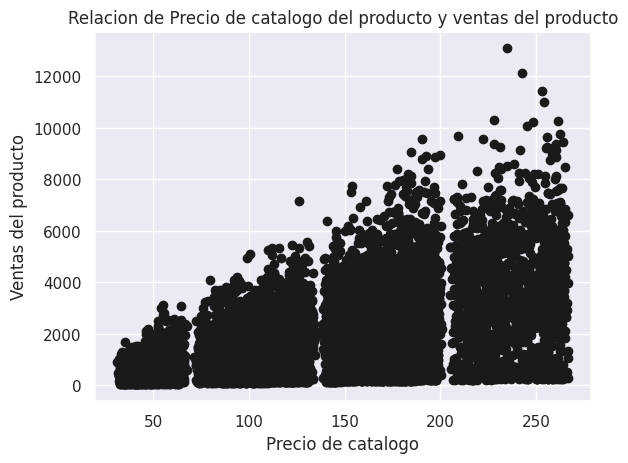

In [93]:
sales = df['Item_Outlet_Sales'].values
mrp = df['Item_MRP'].values
plt.scatter(mrp, sales, c="k" )
plt.xlabel("Precio de catalogo")
plt.ylabel("Ventas del producto")
plt.title("Relacion de Precio de catalogo del producto y ventas del producto")
plt.show()

>* Observaciones: La grafica nos muestra una correlacion entre las ventas del producto y el precio del producto, sin embargo a medida que aumenta el precio del producto tambien aumenta la dispersion en los datos y va disminuyendo la correlacion.

Visibilidad del producto segun su tipo y el tamaño de la tienda


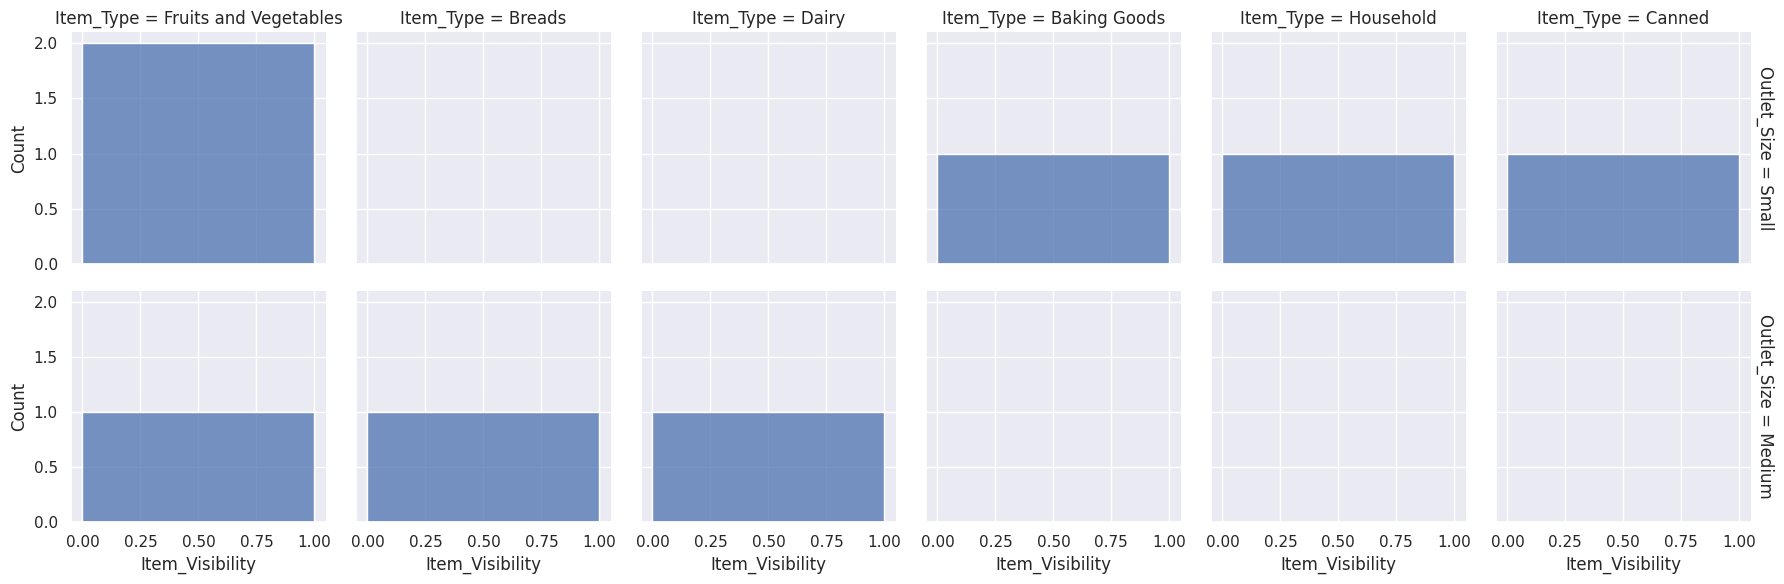

In [119]:
#Queremos Graficar la Visibilidad del producto segun su tipo y el tamaño de la tienda
# Ordenamos el DataFrame por la columna 'Item_Visibility' en orden ascendente
sorted_df = df.sort_values(by='Item_Visibility')
lowest_4 = sorted_df[:4]    # Seleccionamos las 4 primeras filas
highest_4 = sorted_df[-4:]  #Seleccionamos las 4 últimas filas

# Concatenamos ambos DataFrames para obtener un solo DataFrame con las filas deseadas
filter_visibility = pd.concat([lowest_4, highest_4])

# Seleccionamos los valores únicos de la columna 'Item_Type' en el DataFrame filtrado
item_types = filter_visibility['Item_Type'].unique()

# Grafico
sns.set_theme(style='darkgrid')
g = sns.displot(
    filter_visibility, x='Item_Visibility', col='Item_Type', row='Outlet_Size',
    binwidth=1, height=3, facet_kws=dict(margin_titles=True),
)
g.set_titles("Visibilidad segun el tipo de producto y el tamaño de la tienda")
print("Visibilidad del producto segun su tipo y el tamaño de la tienda")

>* Observaciones:
1. Este grafico nos muestra el indice de frecuencia de la visibilidad de los tipos de producto según el tamaño de la tienda, podemos observar que en las tiendas pequeñas Fruits and Vegetables son los de mayor visibilidad, de visibilidad media estan: household, canes, y baking goods, y con menos visibilidad estan: breads y dairy.
2. En las tiendas medianas Fruits and Vegetables, Breads y Dairy tienen una misma visibilidad media, y con menos vibilidad estan: household, canes, y baking goods.

3. Se puede identificar que las tiendas pequeñas estan más accesibles a los nichos de vivienda por lo que es más frecuente que tengas compras de frutas y verduras frescas

Text(0.5, 1.0, 'Ventas en relacion al tamaño de la tienda')

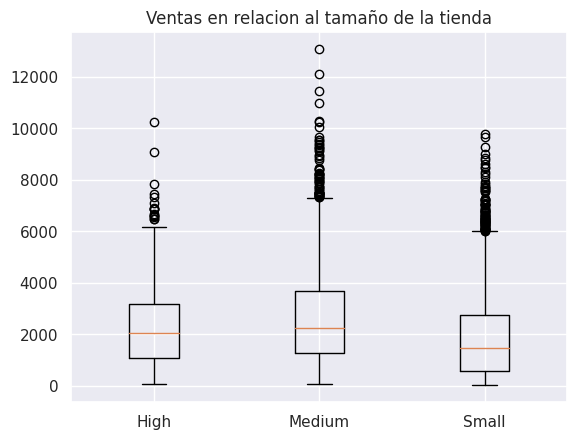

In [120]:
#Se muestra la relacion entre el tamaño de la tienda y las ventas de la tienda
High = df.loc[df['Outlet_Size']=='High','Item_Outlet_Sales'].values
Medium = df.loc[df['Outlet_Size']=='Medium','Item_Outlet_Sales'].values
Small = df.loc[df['Outlet_Size']=='Small','Item_Outlet_Sales'].values
plt.boxplot([High, Medium, Small], labels=['High', 'Medium', 'Small'])
plt.title('Ventas en relacion al tamaño de la tienda')

>* Observaciones:

1. La tienda con mayores ventas son las de tamaño Medium, ya que tiene una mediana de ventas mas alta que las medianas de High, y las ventas menos representativas las tiene las tiendas de tamaño Small.

2. Así mismo, las tiendas de tamaño Medium tiene más outliers hacia arriba

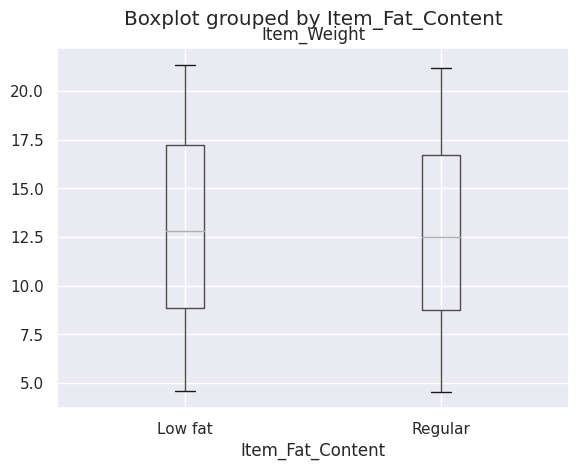

In [121]:
# Item_Outlet_Sales y Item_MRP (Precio máximo de venta al público (precio de catálogo) del producto)
#Aqui se muestra la relacion entre el peso del producto y el indice de grasa
df.boxplot(column = 'Item_Weight', by = 'Item_Fat_Content');

>* Observaciones: la grafica no nos muestra una diferencia entre el peso del producto y su contenido de grasa.

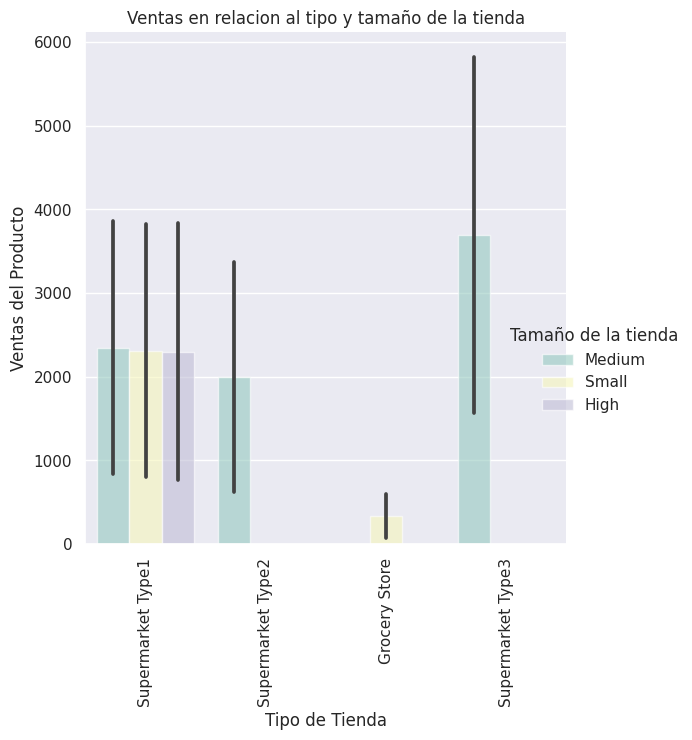

In [124]:
#Definimos las variables a graficar, el ipo de grafico y colores
g = sns.catplot(
    data=df, kind="bar",
    x='Outlet_Type', y="Item_Outlet_Sales", hue="Outlet_Size",
    errorbar="sd", palette="Set3", alpha=.6, height=6
    )
#definimos las leyendas y el titulo.
g.despine(top=True)
g.set_axis_labels("Tipo de Tienda", "Ventas del Producto")
g.legend.set_title("Tamaño de la tienda")
plt.title('Ventas en relacion al tipo y tamaño de la tienda')
plt.xticks(rotation=90);

> * Observaciones: la grafica nos muestra que las mayores ventas estan en los supermercados medianos Tipo3, tambien nos muestra que todos los supermercados Tipo1 tienen ventas similares sin importar el tamaño de la tienda.

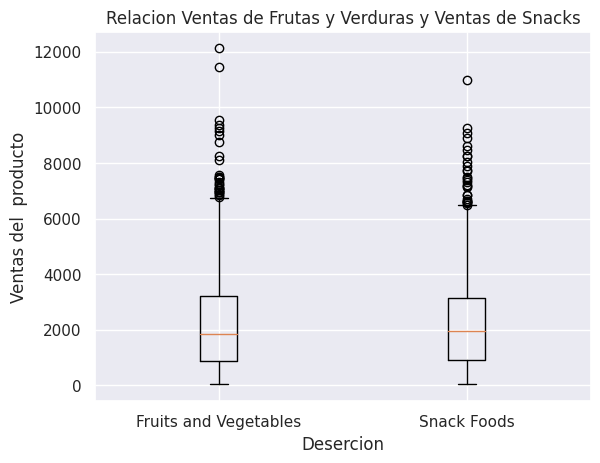

In [125]:
#boxplot para la relacion de la distancia de la casa y la desercion laboral
#La variable de comparacion debe ser numerica
plt.boxplot([df[df['Item_Type']=='Fruits and Vegetables']['Item_Outlet_Sales'], df[df['Item_Type']=='Snack Foods']['Item_Outlet_Sales']])
plt.xlabel('Desercion')
plt.ylabel('Ventas del  producto')
plt.title("Relacion Ventas de Frutas y Verduras y Ventas de Snacks")
plt.xticks([1,2], ['Fruits and Vegetables', 'Snack Foods']);

>* Observaciones: al intentar comparar los alimentos con mas contenido nutricional como los son las frutas y verduras con productos de menos contenido nutricional como los snaks no se observan diferencias en las ventas a excepcion de algunos ouliers para frutas y verduras.

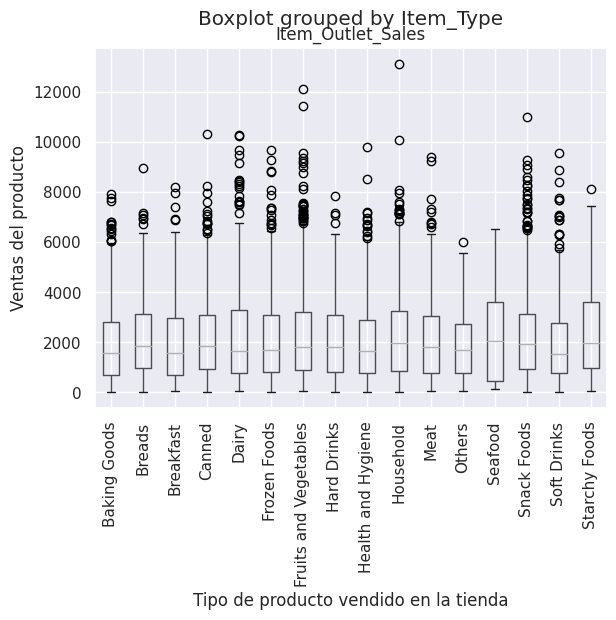

In [126]:
df.boxplot(column = 'Item_Outlet_Sales', by = 'Item_Type')
plt.xlabel("Tipo de producto vendido en la tienda")
plt.ylabel("Ventas del producto")
plt.xticks(rotation=90);

>* Observaciones: los unicos productos que sobresalen un poco de la mediana de ventas son los alimentos del mar (seafoods), alimentos a base de almidon (starchy foods), y en menor proporcion productos del hogar (household), los Dairy tienen ventas sobresalientes pero en algun punto en especifico ya que su mediana esta por debajo de los otros productos.

In [86]:
corr = df.corr()

<ipython-input-86-45893e33df67>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

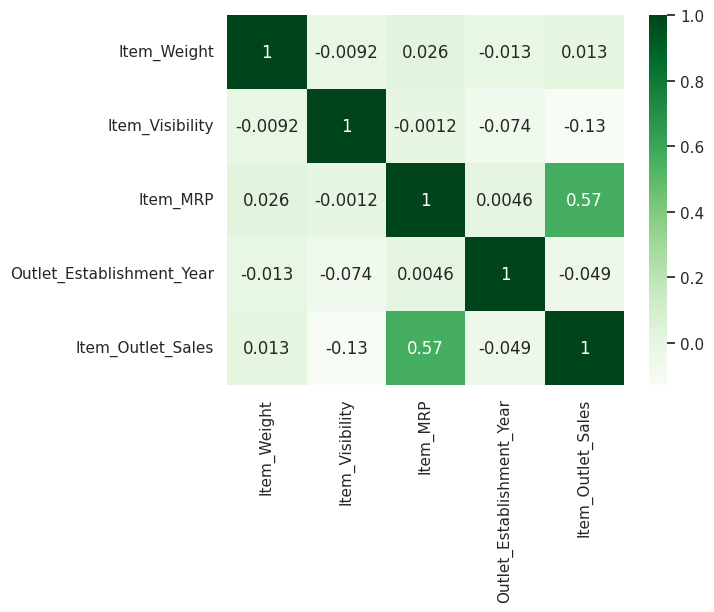

In [87]:
sns.heatmap(corr, cmap = 'Greens', annot = True)

En el mapa de calor se observa una correlacion positiva moderada entre las columnas Item_Outlet_Sales y Item_MRP:

1. Item_Outlet_Sales (Ventas del producto en una tienda en particular)
2. Item_MRP (Precio máximo de venta al público (precio de catálogo) del producto)



###IV. **Conclusiones**

1. Encontramos una correlacion moderada entre el precio del producto y el precio de catalogo del producto, esto nos puede indicar que el precio máximo de venta al público ha estado bien recibido por los clientes ya que esta relacionado con las ventas del producto, sin embargo la correlacion es moderada no alta, por lo que hace falta revisar otras variables que nos indiquen el mejor camino sobre los precios de venta para aumentar las ventas del producto.

2. Encontramos una correlacion entre las ventas de la tienda y el tipo de tienda supermarket Tipo1 y Supermarket Tipo3, con las mejores ventas, sin importar el tamaño de la tienda.

###V. **Referencias**

* [Curso Coding Dojo - Data Science](https://github.com/fralfaro/CD-DS-Course)
* [Kaggle - Competitions](https://www.kaggle.com/competitions)
* [fralfaro-github-vusualization](https://fralfaro.github.io/MAT281_2022/lectures/data_manipulation/visualization/seaborn/)